In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [17]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [18]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [19]:
'{:%B %Y}'.format(curr_month)

'July 2017'

<h2>Основная таблица</h2>

In [20]:
rep_2016_17 = report['2016':] # данные с 2016 по н.в.
rep_2016_17

channels                             goals                       
             yandex google go.mail.ru  bry  cpc order basket contact measure
2016-01-31     4471   1253        537  123  316     6    160     367      16
2016-02-29     5630   1683        597   88  543    19    264     533      10
2016-03-31     5946   1641        530  101  514    22    217     571      20
2016-04-30     5887   1470        479   69  228    24    196     484      12
2016-05-31     5846   1183        361   87    0    21    243     485      27
2016-06-30     5913   1134        351   76    0    12    257     478      17
2016-07-31     5166   1108        364   58    0    15    213     396      20
2016-08-31     4689   1120        348   59    0    30    308     349      18
2016-09-30     4244   1071        302   53    0     6    238     321      15
2016-10-31     4153   1711        329   38    0     6    210     357      28
2016-11-30     3853   2491        304   46    0    14    224     436      21
2016-12-31     2781   2551        291  606    0    16    139     358      15
2017-01-31     2949   3084        375  511    0     4    243     355       8
2017-02-28     2701   2414        282  486    0     8    197     311      14
2017-03-31     2590   2283        284  426    0    11    157     298      11
2017-04-30     1890   2390        243  395    0    10    123     260      31
2017-05-31     2006   2584        110  389    0     4    106     221      29
2017-06-30     2048   2164        154  407    0     7    137     182      24
2017-07-31     2218   2172        147  316    0     4     81     221      16

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [21]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-07-31      170      8         -7 -91   0    -3    -56      39      -8

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

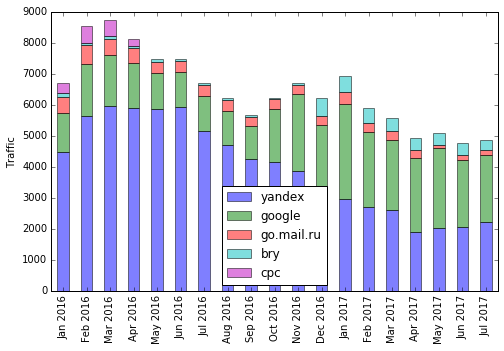

In [22]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2016_17.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2016_17.index]);

<h3>Линейная диаграмма изменений трафика</h3>

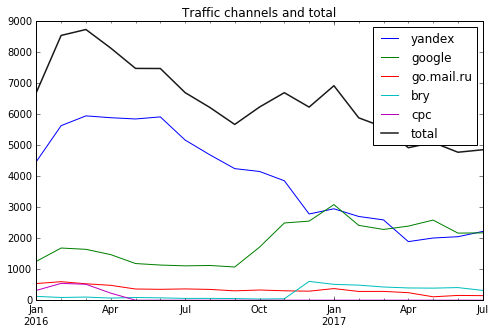

In [23]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2016_17.channels.plot(ax=ax);
rep_2016_17.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [24]:
kw = 'keyword visit'.split()

In [25]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing   0                                       двери в ванную     16
       1                               входные двери недорого     15
       2                                         двери книжка     14
       3                       двери с доставкой и установкой     13
       4                                   двери с фурнитурой     13
       5                                    двери белорусские     12
       6               ульяновские двери межкомнатные каталог     12
       7                                       двери недорого     11
       8                                       двери под ключ     11
       9                                           двери купе     10
       10                                  двери межкомнатные     10
       11                                         двери верда      9
       12                                 двери эмалированные      9
       13                                    двери из массива      8
       14                                        двери эконом      8
       15                        межкомнатные двери с замками      8
       16                            входные деревянные двери      7
       17                                      двери гармошка      7
       18                                         двери эмаль      7
       19               купить ульяновские межкомнатные двери      7
       20                 ульяновские двери межкомнатные цены      7
       21                                    двери со скидкой      6
       22                         магазин межкомнатных дверей      6
       23                      ульяновские межкомнатные двери      6
       24                                   арки межкомнатные      5
       25                                     двери в наличии      5
       26                               дешевые входные двери      5
       27                                  входные двери цена      4
       28                                               двери      4
       29                           двери ульяновские каталог      4
...                                                       ...    ...
yandex 741                     стекло в кухонную дверь купить      1
       742              стеклянное полотно для двери 600 1900      1
       743   стеклянные двери на кухню с распашным механизмом      1
       744                          стеклянные дверные группы      1
       745                        стеллаж с дверцами на кухню      1
       746                              стена дверь для кухни      1
       747                      столярный щит полотно дверное      1
       748               тентовое полотно для дверного проема      1
       749        толщина дверного полотна межкомнатной двери      1
       750        толщина дверного полотна межкомнатной двери      1
       751                      толщина полотна входной двери      1
       752          тонкое дверное полотно до 2 5 см толщиной      1
       753  тонкое дверное щитовое полотно до 2 5 см толщиной      1
       754                     узкие дверные полотна на заказ      1
       755                       узкое дверное полотно купить      1
       756              улица жигулевская дом 4 дверный склад      1
       757                установить дверное полотно в москве      1
       758                          установка дверей на кухне      1
       759                 установка дверей на кухне под ключ      1
       760                          установка дверей на кухню      1
       761                           установка двери на кухню      1
       762                         установка дверного полотна      1
       763                           фасадные двери для кухни      1
       764                        фото модных кухонных дверей      1
       765  фрамужная конструкция для двери английская реш...      1
       766   цена дверное полотно с коробкой сосна цвет венге      1
       767      цены каталог касторама откатные двер

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [26]:
data[kw].xs(0, level=1)

,keyword,visit
bing,двери в ванную,16
go.mail.ru,(not set),145
google,np - /?cnt=catalog&r=2438,261
yahoo,np - /,2
yandex,(not set),1380


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [27]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                     двери в ванную     16
           1                             входные двери недорого     15
           2                                       двери книжка     14
           3                     двери с доставкой и установкой     13
           4                                 двери с фурнитурой     13
go.mail.ru 0                                          (not set)    145
           1             купить межкомнатные двери с установкой      2
google     0                          np - /?cnt=catalog&r=2438    261
           1                          np - /?cnt=catalog&r=1428    142
           2                                             np - /    110
           3                                   np - /?pid=pokaz     98
           4                             дверные полотна купить     42
yahoo      0                                             np - /      2
           1                          np - /?cnt=catalog&r=1428      2
           2                            np - /?pid=menu-katalog      2
           3                          np - /?cnt=catalog&r=1395      1
           4                 купить межкомнатную дверь в москве      1
yandex     0                                          (not set)   1380
           1  межкомнатные двери недорого с установкой под ключ      6
           2  межкомнатные двери недорого с установкой под к...      5
           3                                       took-took.ru      4
           4    межкомнатные двери недорого с установкой москва      4